In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,f1_score,confusion_matrix
import numpy as np

warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/LeeMorinUCF/QMB6358S22/main/demo_24_Classification/credit.csv')
df.head(10)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,...,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,...,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,...,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,...,2,A123,28,A143,A152,2,A174,1,A191,A201


In [13]:
print(df.isna().sum())
print(df.duplicated().sum())
print(df.dtypes)
print(df.nunique())

Default            0
checkingstatus1    0
duration           0
history            0
purpose            0
amount             0
savings            0
employ             0
installment        0
status             0
others             0
residence          0
property           0
age                0
otherplans         0
housing            0
cards              0
job                0
liable             0
tele               0
foreign            0
dtype: int64
0
Default             int64
checkingstatus1    object
duration            int64
history            object
purpose            object
amount              int64
savings            object
employ             object
installment         int64
status             object
others             object
residence           int64
property           object
age                 int64
otherplans         object
housing            object
cards               int64
job                object
liable              int64
tele               object
foreign            objec

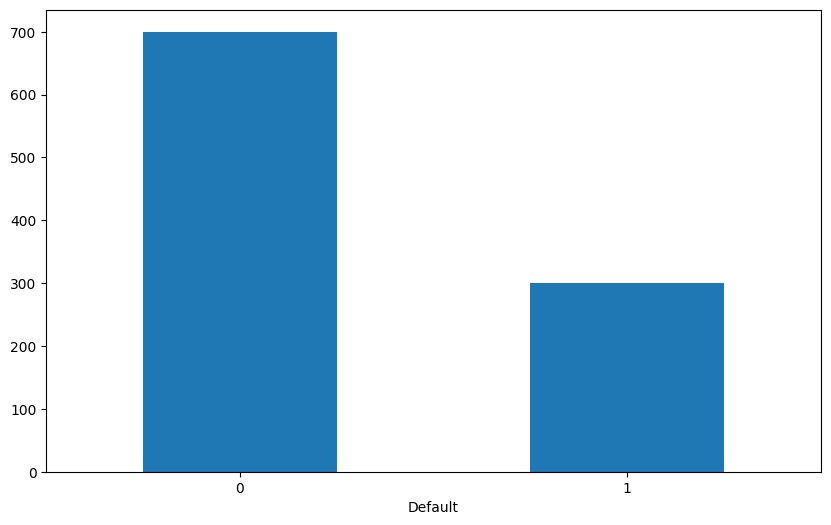

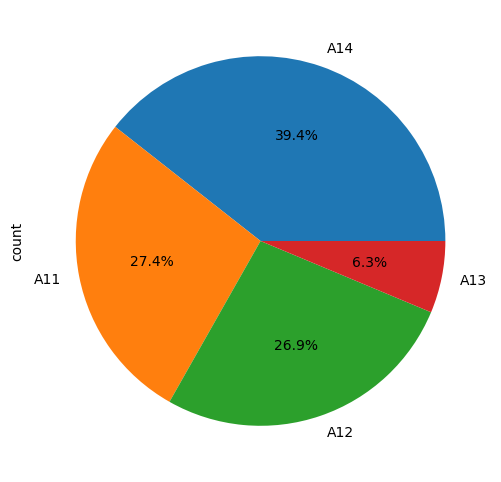

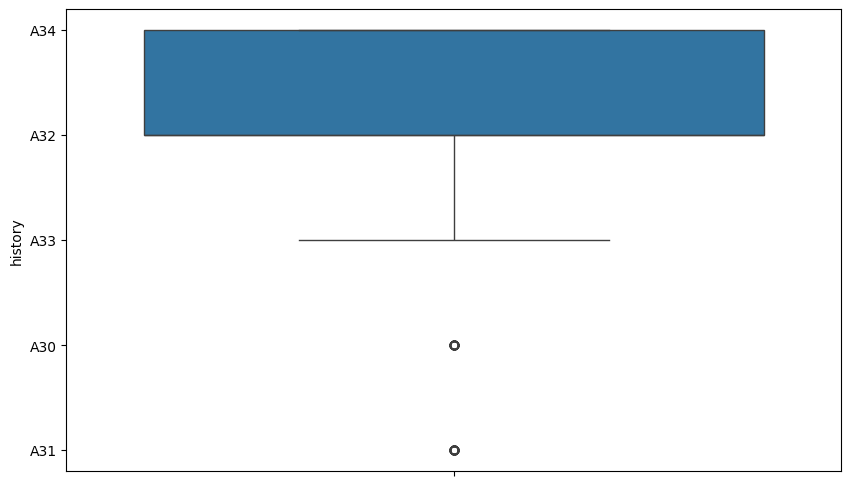

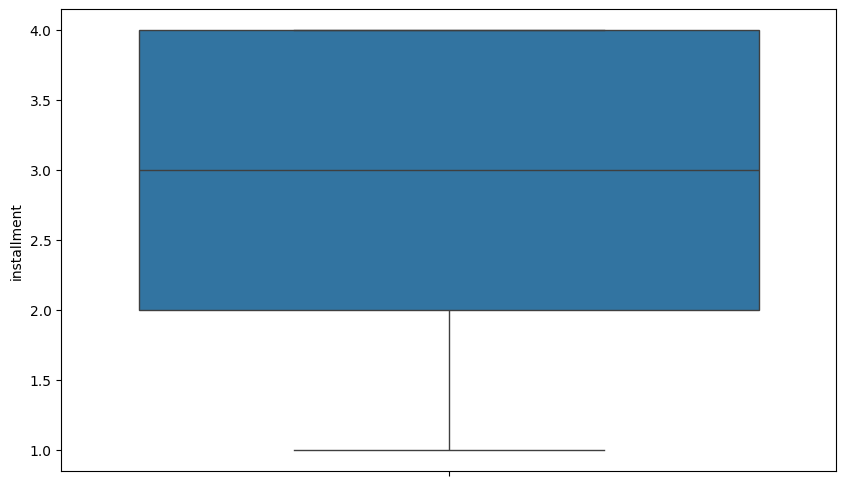

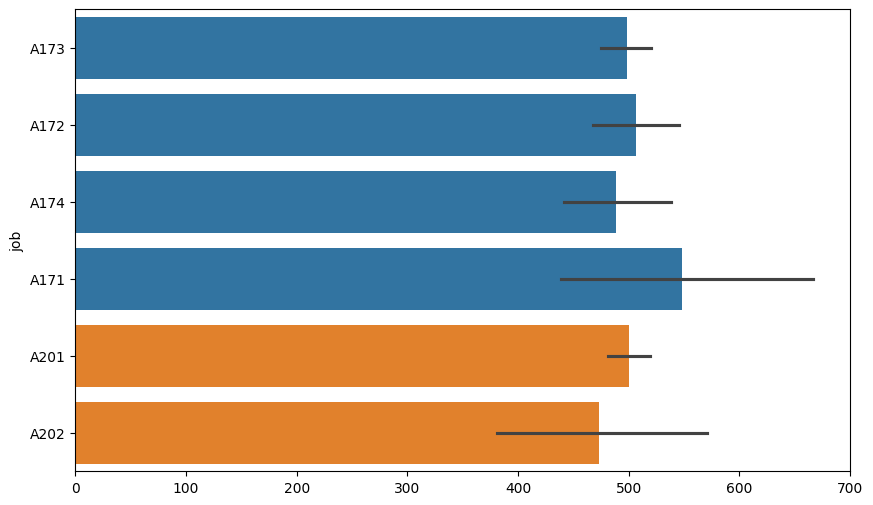

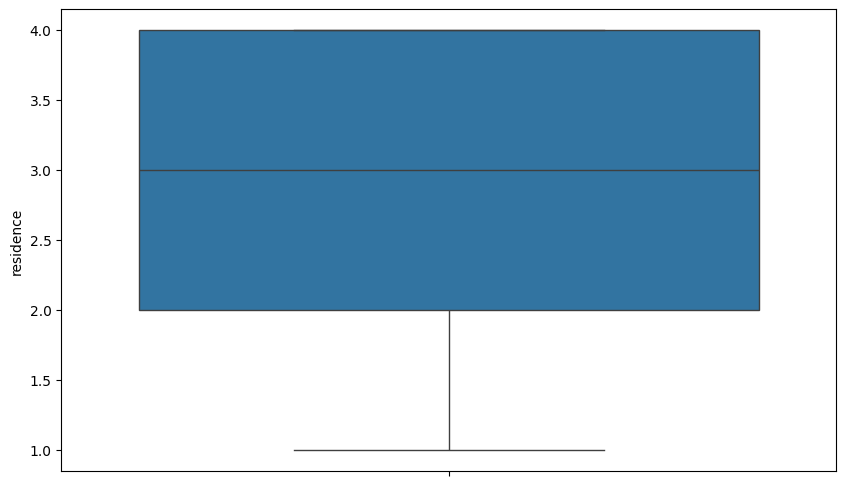

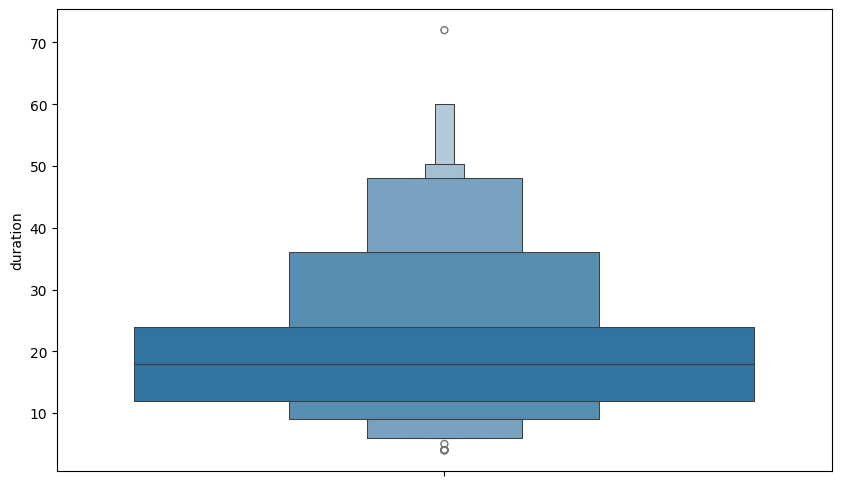

In [14]:
plt.figure(figsize=(10,6))
df['Default'].value_counts().plot(kind='bar',rot=0)
plt.show()



plt.figure(figsize=(10,6))
df['checkingstatus1'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(df['history'])
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(df['installment'])
plt.show()



plt.figure(figsize=(10,6))
sns.barplot(df['job'])
sns.barplot(df['foreign'])
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(df['residence'])
plt.show()


plt.figure(figsize=(10,6))
sns.boxenplot(df['duration'])
plt.show()

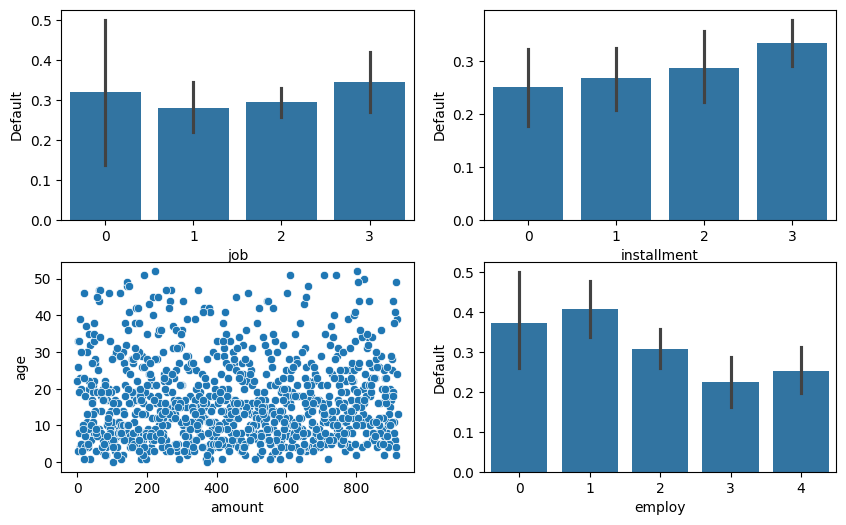

In [15]:
df1 = df.copy()


le = LabelEncoder()

for i in df1:
    df1[i] = le.fit_transform(df1[i])




def sub(df1):
    f,axs = plt.subplots(2,2,figsize=(10,6))
    sns.barplot(x='job',y='Default',ax=axs[0,0],data=df1)
    sns.barplot(x='installment',y='Default',ax=axs[0,1],data=df1)
    sns.scatterplot(x='amount',y='age',ax=axs[1,0],data=df1)
    sns.barplot(x='employ',y='Default',ax=axs[1,1],data=df1)
    plt.show()
    
sub(df1)

In [16]:
X = df.drop('Default',axis=1)
y = df['Default']




X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


ohe = OneHotEncoder()
sc = StandardScaler()



ct = make_column_transformer(
    (ohe,X.select_dtypes(include='object').columns),
    (sc,X.select_dtypes(include=['int64','float64']).columns),remainder='passthrough')



ct.fit_transform(X)



models = {
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GrdientBoostingClassifier":GradientBoostingClassifier(),
    "BaggingClassifier":BaggingClassifier(),
    "Knneighbors":KNeighborsClassifier()
}


def evaluate_models(model, X_train, X_test, y_train, y_test):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc = roc_auc_score(y_test, pred_prob)
    
    return model.__class__.__name__, acc * 100, roc * 100, f1 * 100


for name, model in models.items():
    model_name, acc, roc, f1 = evaluate_models(model, X_train, X_test, y_train, y_test)
    print(f'{model_name} -- Accuracy: {acc:.2f}%, ROC AUC: {roc:.2f}%, F1: {f1:.2f}%')


LogisticRegression -- Accuracy: 79.50%, ROC AUC: 81.85%, F1: 61.68%
RandomForestClassifier -- Accuracy: 76.50%, ROC AUC: 80.63%, F1: 48.35%
GradientBoostingClassifier -- Accuracy: 78.50%, ROC AUC: 81.42%, F1: 58.25%
BaggingClassifier -- Accuracy: 73.50%, ROC AUC: 77.20%, F1: 45.36%
KNeighborsClassifier -- Accuracy: 76.50%, ROC AUC: 78.42%, F1: 50.53%


In [17]:
X = df.drop('Default',axis=1)
y = df['Default']




X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


ohe = OneHotEncoder()
sc = StandardScaler()



ct = make_column_transformer(
    (ohe,X.select_dtypes(include='object').columns),
    (sc,X.select_dtypes(include=['int64','float64']).columns),remainder='passthrough')



ct.fit_transform(X)



models = {
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GrdientBoostingClassifier":GradientBoostingClassifier(),
    "Knneighbors":KNeighborsClassifier()
}


def evaluate_models(model, X_train, X_test, y_train, y_test):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc = roc_auc_score(y_test, pred_prob)
    
    return model.__class__.__name__, acc * 100, roc * 100, f1 * 100


for name, model in models.items():
    model_name, acc, roc, f1 = evaluate_models(model, X_train, X_test, y_train, y_test)
    print(f'{model_name} -- Accuracy: {acc:.2f}%, ROC AUC: {roc:.2f}%, F1: {f1:.2f}%')


LogisticRegression -- Accuracy: 79.50%, ROC AUC: 81.85%, F1: 61.68%
RandomForestClassifier -- Accuracy: 78.00%, ROC AUC: 79.74%, F1: 52.17%
GradientBoostingClassifier -- Accuracy: 79.00%, ROC AUC: 81.62%, F1: 59.62%
KNeighborsClassifier -- Accuracy: 76.50%, ROC AUC: 78.42%, F1: 50.53%


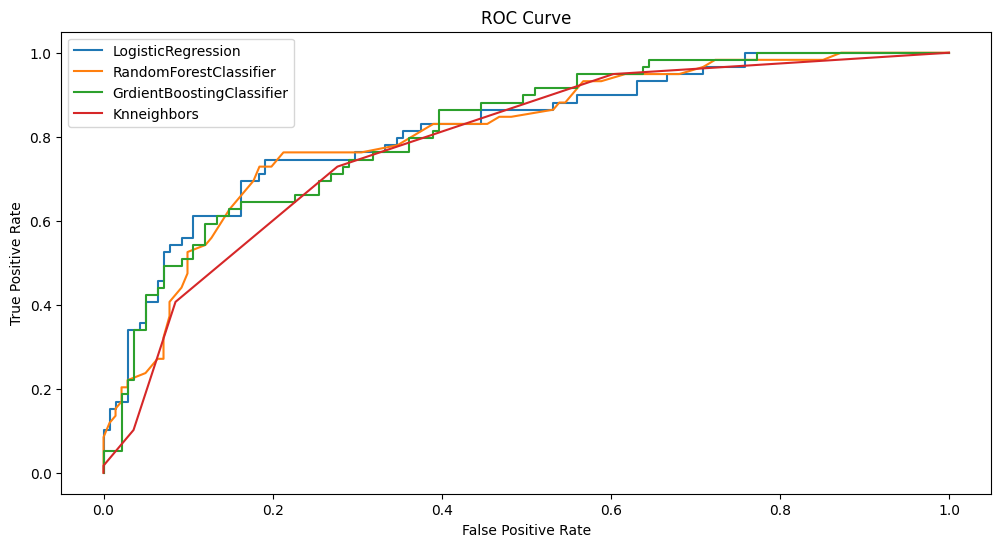

In [18]:
def plot_roc_curve(models,X_test,y_test):
    plt.figure(figsize=(12,6))
    
    for name, model in models.items():
        pipe = make_pipeline(ct,model).fit(X_train, y_train)
        pred_prob = pipe.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, pred_prob)
        plt.plot(fpr, tpr, label=name)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


plot_roc_curve(models, X_test, y_test)

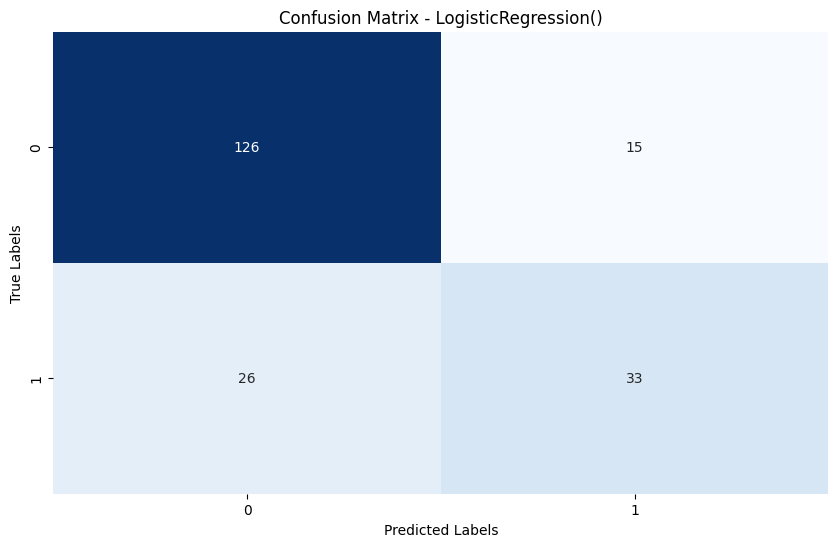

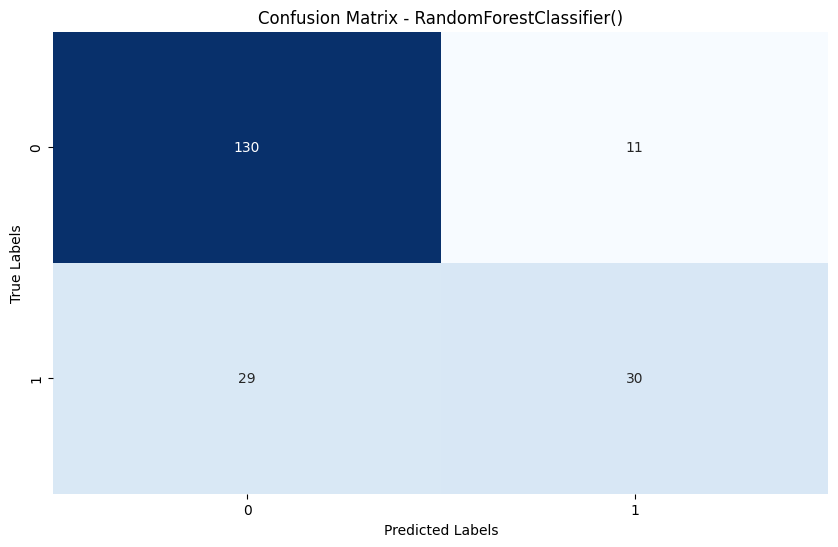

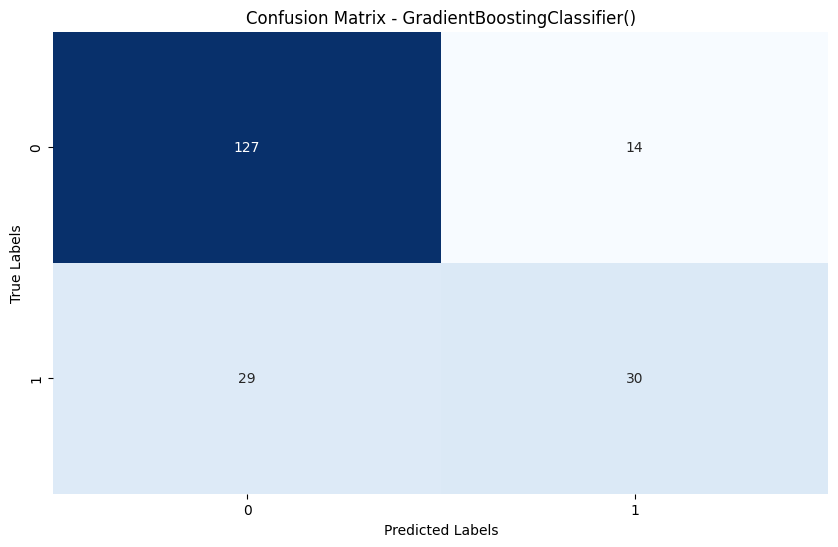

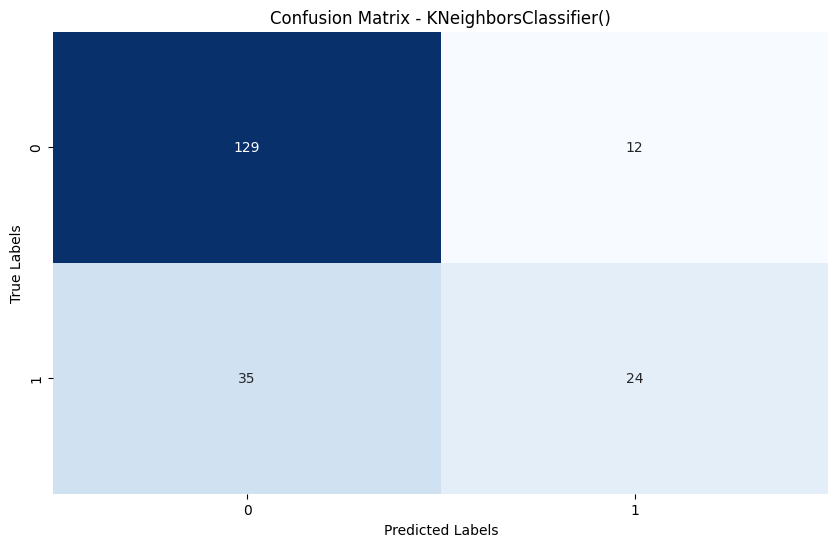

In [20]:
def plot_confusion_matrix(y_test, y_pred, models):
    conmap = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(conmap, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {models}')
    plt.show()




for model_name, model in models.items():

    pipe = make_pipeline(ct,model).fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    

    plot_confusion_matrix(y_test, y_pred, model)


In [21]:

def cross_validation(X,y,models):
    pipe = make_pipeline(ct,models).fit(X,y)
    cv_scores = cross_val_score(pipe, X,y,cv=10,scoring='roc_auc').max()
    print(f'{model.__class__.__name__}, The cv scores using 10-fold-cross validation: {cv_scores*100:.2f}')
    return cv_scores


for model_name,model in models.items():
    cv_scores = cross_validation(X, y,model)
    

LogisticRegression, The cv scores using 10-fold-cross validation: 84.62
RandomForestClassifier, The cv scores using 10-fold-cross validation: 85.90
GradientBoostingClassifier, The cv scores using 10-fold-cross validation: 86.57
KNeighborsClassifier, The cv scores using 10-fold-cross validation: 81.86


In [22]:
lr_random_param_grid = {
    'logisticregression__C': np.logspace(-4,4,9),
    'logisticregression__penalty': ['l1','l2']
}

lr_random_search = RandomizedSearchCV(
    make_pipeline(ct,LogisticRegression()),
    lr_random_param_grid,
    scoring='roc_auc',
    cv=10
).fit(X_train, y_train)


# Best Logistic Regression model
best_lr_estimator = lr_random_search.best_estimator_
lr_random_pred = best_lr_estimator.predict(X_test)
lr_random_pred_prob = best_lr_estimator.predict_proba(X_test)[:,1]
print(f'Logistic Regression - Best Parameters: {lr_random_search.best_params_}')
print(f'Logistic Regression - Best ROC-AUC Score: {lr_random_search.best_score_ * 100:.2f}%')




rfc_param_grid = {
    'randomforestclassifier__n_estimators': [50,100,200],
    'randomforestclassifier__max_depth': [None,10,20],
    'randomforestclassifier__min_samples_split': [2,5,10],
    'randomforestclassifier__min_samples_leaf': [1,2,4]
}

rfc_random_search = RandomizedSearchCV(
    make_pipeline(ct,RandomForestClassifier()),
    rfc_param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=10
).fit(X_train, y_train)

best_rfc_estimator = rfc_random_search.best_estimator_
rfc_random_pred = best_rfc_estimator.predict(X_test)
rfc_random_pred_prob = best_rfc_estimator.predict_proba(X_test)[:, 1]
print(f'Random Forest - Best Parameters: {rfc_random_search.best_params_}')
print(f'Random Forest - Best ROC-AUC Score: {rfc_random_search.best_score_ * 100:.2f}')




gbc_random_param_grid = {
    'gradientboostingclassifier__n_estimators': [50,100,200],
    'gradientboostingclassifier__learning_rate': [0.01,0.1,0.2],
    'gradientboostingclassifier__max_depth': [3,4,5],
    'gradientboostingclassifier__min_samples_split': [2,5,10],
}
gbc_random_search = RandomizedSearchCV(
    make_pipeline(ct,GradientBoostingClassifier()),
    gbc_random_param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=10,
).fit(X_train,y_train)



knn_param_grid = {
    'kneighborsclassifier__n_neighbors': [3,5,7,10],
    'kneighborsclassifier__weights': ['uniform','distance'],
    'kneighborsclassifier__p': [1,2]
}

knn_grid_search = RandomizedSearchCV(
    make_pipeline(ct,KNeighborsClassifier()),
    knn_param_grid,
    scoring='roc_auc',
    cv=10).fit(X_train, y_train)


best_knn_estimator = knn_grid_search.best_estimator_
knn_grid_pred = best_knn_estimator.predict(X_test)
knn_grid_pred_prob = best_knn_estimator.predict_proba(X_test)[:,1]
print(f'K-Nearest Neighbors - Best Parameters: {knn_grid_search.best_params_}')
print(f'K-Nearest Neighbors - Best ROC-AUC Score: {knn_grid_search.best_score_ * 100:.2f}%')


Logistic Regression - Best Parameters: {'logisticregression__penalty': 'l2', 'logisticregression__C': np.float64(0.1)}
Logistic Regression - Best ROC-AUC Score: 77.77%
Random Forest - Best Parameters: {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': 20}
Random Forest - Best ROC-AUC Score: 78.47
K-Nearest Neighbors - Best Parameters: {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__p': 1, 'kneighborsclassifier__n_neighbors': 10}
K-Nearest Neighbors - Best ROC-AUC Score: 74.44%
